## Composition data
- get the composition and band gap data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline  
%config InlineBackend.figure_format = 'retina'

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/Bg_pre2'

In [3]:
data_df = pd.read_csv('./Data/mp_eda_data.csv')

In [4]:
# get the composition and bandgap data
mp_df = data_df[['composition', 'band_gap']]

In [5]:
# transform the composition_str column to composition column
from matminer.featurizers.conversions import StrToComposition

stc = StrToComposition(target_col_id='composition_type')
mp_trans_df = stc.featurize_dataframe(mp_df, 'composition')

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
StrToComposition: 100%|██████████| 5520/5520 [00:01<00:00, 5227.27it/s] 



In [6]:
mp_trans_df.head()

,composition,band_gap,composition_type
0,Ag8 B48 Cl48,2.7028,"(Ag, B, Cl)"
1,Ag40 Te16 Br12,0.8722,"(Ag, Te, Br)"
2,Ag30 P8 S32 Cl6,1.2888,"(Ag, P, S, Cl)"
3,Ag4 C2 O6,0.4736,"(Ag, C, O)"
4,Ag12 Ge6 S36 O126,2.8072,"(Ag, Ge, S, O)"


In [7]:
mp_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   composition       5520 non-null   object 
 1   band_gap          5520 non-null   float64
 2   composition_type  5520 non-null   object 
dtypes: float64(1), object(2)
memory usage: 129.5+ KB


In [8]:
mp_trans_df['composition'] = mp_trans_df['composition_type']

In [9]:
mp_trans_df.drop(columns=['composition_type'], inplace=True)
mp_trans_df.head()

,composition,band_gap
0,"(Ag, B, Cl)",2.7028
1,"(Ag, Te, Br)",0.8722
2,"(Ag, P, S, Cl)",1.2888
3,"(Ag, C, O)",0.4736
4,"(Ag, Ge, S, O)",2.8072


In [10]:
mp_df = mp_trans_df
mp_df.head()

,composition,band_gap
0,"(Ag, B, Cl)",2.7028
1,"(Ag, Te, Br)",0.8722
2,"(Ag, P, S, Cl)",1.2888
3,"(Ag, C, O)",0.4736
4,"(Ag, Ge, S, O)",2.8072


In [11]:
mp_df['composition'] = mp_df['composition'].apply(lambda x: str(x).replace(" ", ""))
mp_df.head()

,composition,band_gap
0,Ag8B48Cl48,2.7028
1,Ag40Te16Br12,0.8722
2,Ag30P8S32Cl6,1.2888
3,Ag4C2O6,0.4736
4,Ag12Ge6S36O126,2.8072


In [12]:
mp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   composition  5520 non-null   object 
 1   band_gap     5520 non-null   float64
dtypes: float64(1), object(1)
memory usage: 86.4+ KB


In [13]:
# Save the data of composition and band_gap to a csv file
file_path = os.path.join(current_dir, './Data/composition_data/mp_band_gap.csv')
os.makedirs(os.path.dirname(file_path), exist_ok=True)
mp_df.to_csv(file_path, index=False)

## Experimental data

In [30]:
# read the data from the csv file
file_path = os.path.join(current_dir, './Data/Ya Zhuo et data.csv')
exp_df = pd.read_csv(file_path)
exp_df.rename(columns={'Eg (eV)': 'band_gap'}, inplace=True)
exp_df.head()

,composition,band_gap
0,Hg0.7Cd0.3Te,0.35
1,CuBr,3.08
2,LuP,1.30
3,Cu3SbSe4,0.40
4,ZnO,3.44


In [31]:
exp_df.describe()

,band_gap
count,6354.000000
mean,1.252225
std,1.539961
min,0.000000
25%,0.000000
50%,0.710000
75%,2.130000
max,11.700000


In [32]:
# remove the mental data that the bandgap is 0eV, we only keep the semiconductors
exp_df = exp_df[exp_df['band_gap'] > 0]
exp_df.describe()

,band_gap
count,3896.000000
mean,2.042259
std,1.501390
min,0.020000
25%,1.000000
50%,1.830000
75%,2.640000
max,11.700000


In [33]:
# get rid of the data that the bandgap is greater than 3eV
exp_df = exp_df[exp_df['band_gap'] < 3]
exp_df.describe()

,band_gap
count,3130.000000
mean,1.480380
std,0.803089
min,0.020000
25%,0.800000
50%,1.500000
75%,2.167500
max,2.990000


In [34]:
exp_trans_df = stc.featurize_dataframe(exp_df, 'composition', ignore_errors=True)

StrToComposition: 100%|██████████| 3130/3130 [00:00<00:00, 5173.27it/s] 



In [35]:
exp_trans_df['composition'] = exp_trans_df['composition_type']
exp_trans_df.drop(columns=['composition_type'], inplace=True)
exp_trans_df.head()

,composition,band_gap
0,"(Hg, Cd, Te)",0.35
2,"(Lu, P)",1.30
3,"(Cu, Sb, Se)",0.40
5,"(Pt, Sb)",0.08
6,"(Zn, In, S)",2.68


In [36]:
exp_trans_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3130 entries, 0 to 3895
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   composition  3130 non-null   object 
 1   band_gap     3130 non-null   float64
dtypes: float64(1), object(1)
memory usage: 73.4+ KB


In [37]:
len(exp_trans_df['composition'].unique())

1967

In [38]:
exp_df = exp_trans_df
exp_df.head()

,composition,band_gap
0,"(Hg, Cd, Te)",0.35
2,"(Lu, P)",1.30
3,"(Cu, Sb, Se)",0.40
5,"(Pt, Sb)",0.08
6,"(Zn, In, S)",2.68


In [40]:
from pymatgen.core import Element
# 不包括重金属元素和稀土元素
exclude_elements = ['Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po',
                    'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf',
                    'Es', 'Fm', 'Md', 'No', 'Lr', 'Rf', 'Db', 'Sg', 'Bh', 'Hs', 'Mt', 'Ds', 'Rg',
                    'Cn', 'Nh', 'Fl', 'Mc', 'Lv', 'Ts', 'Og', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
                    'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu']
exclude_elements = [Element(el) for el in exclude_elements]
len(exclude_elements)

62

In [41]:
# 查看exp_df中是否有重金属元素和稀土元素
# 排除元素
exp_df[exp_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))].shape

(1200, 2)

In [42]:
# 过滤掉包含重金属元素和稀土元素的材料
exp_df = exp_df[~exp_df['composition'].apply(lambda x: any(elem in exclude_elements for elem in x.elements))]
exp_df.shape

(1930, 2)

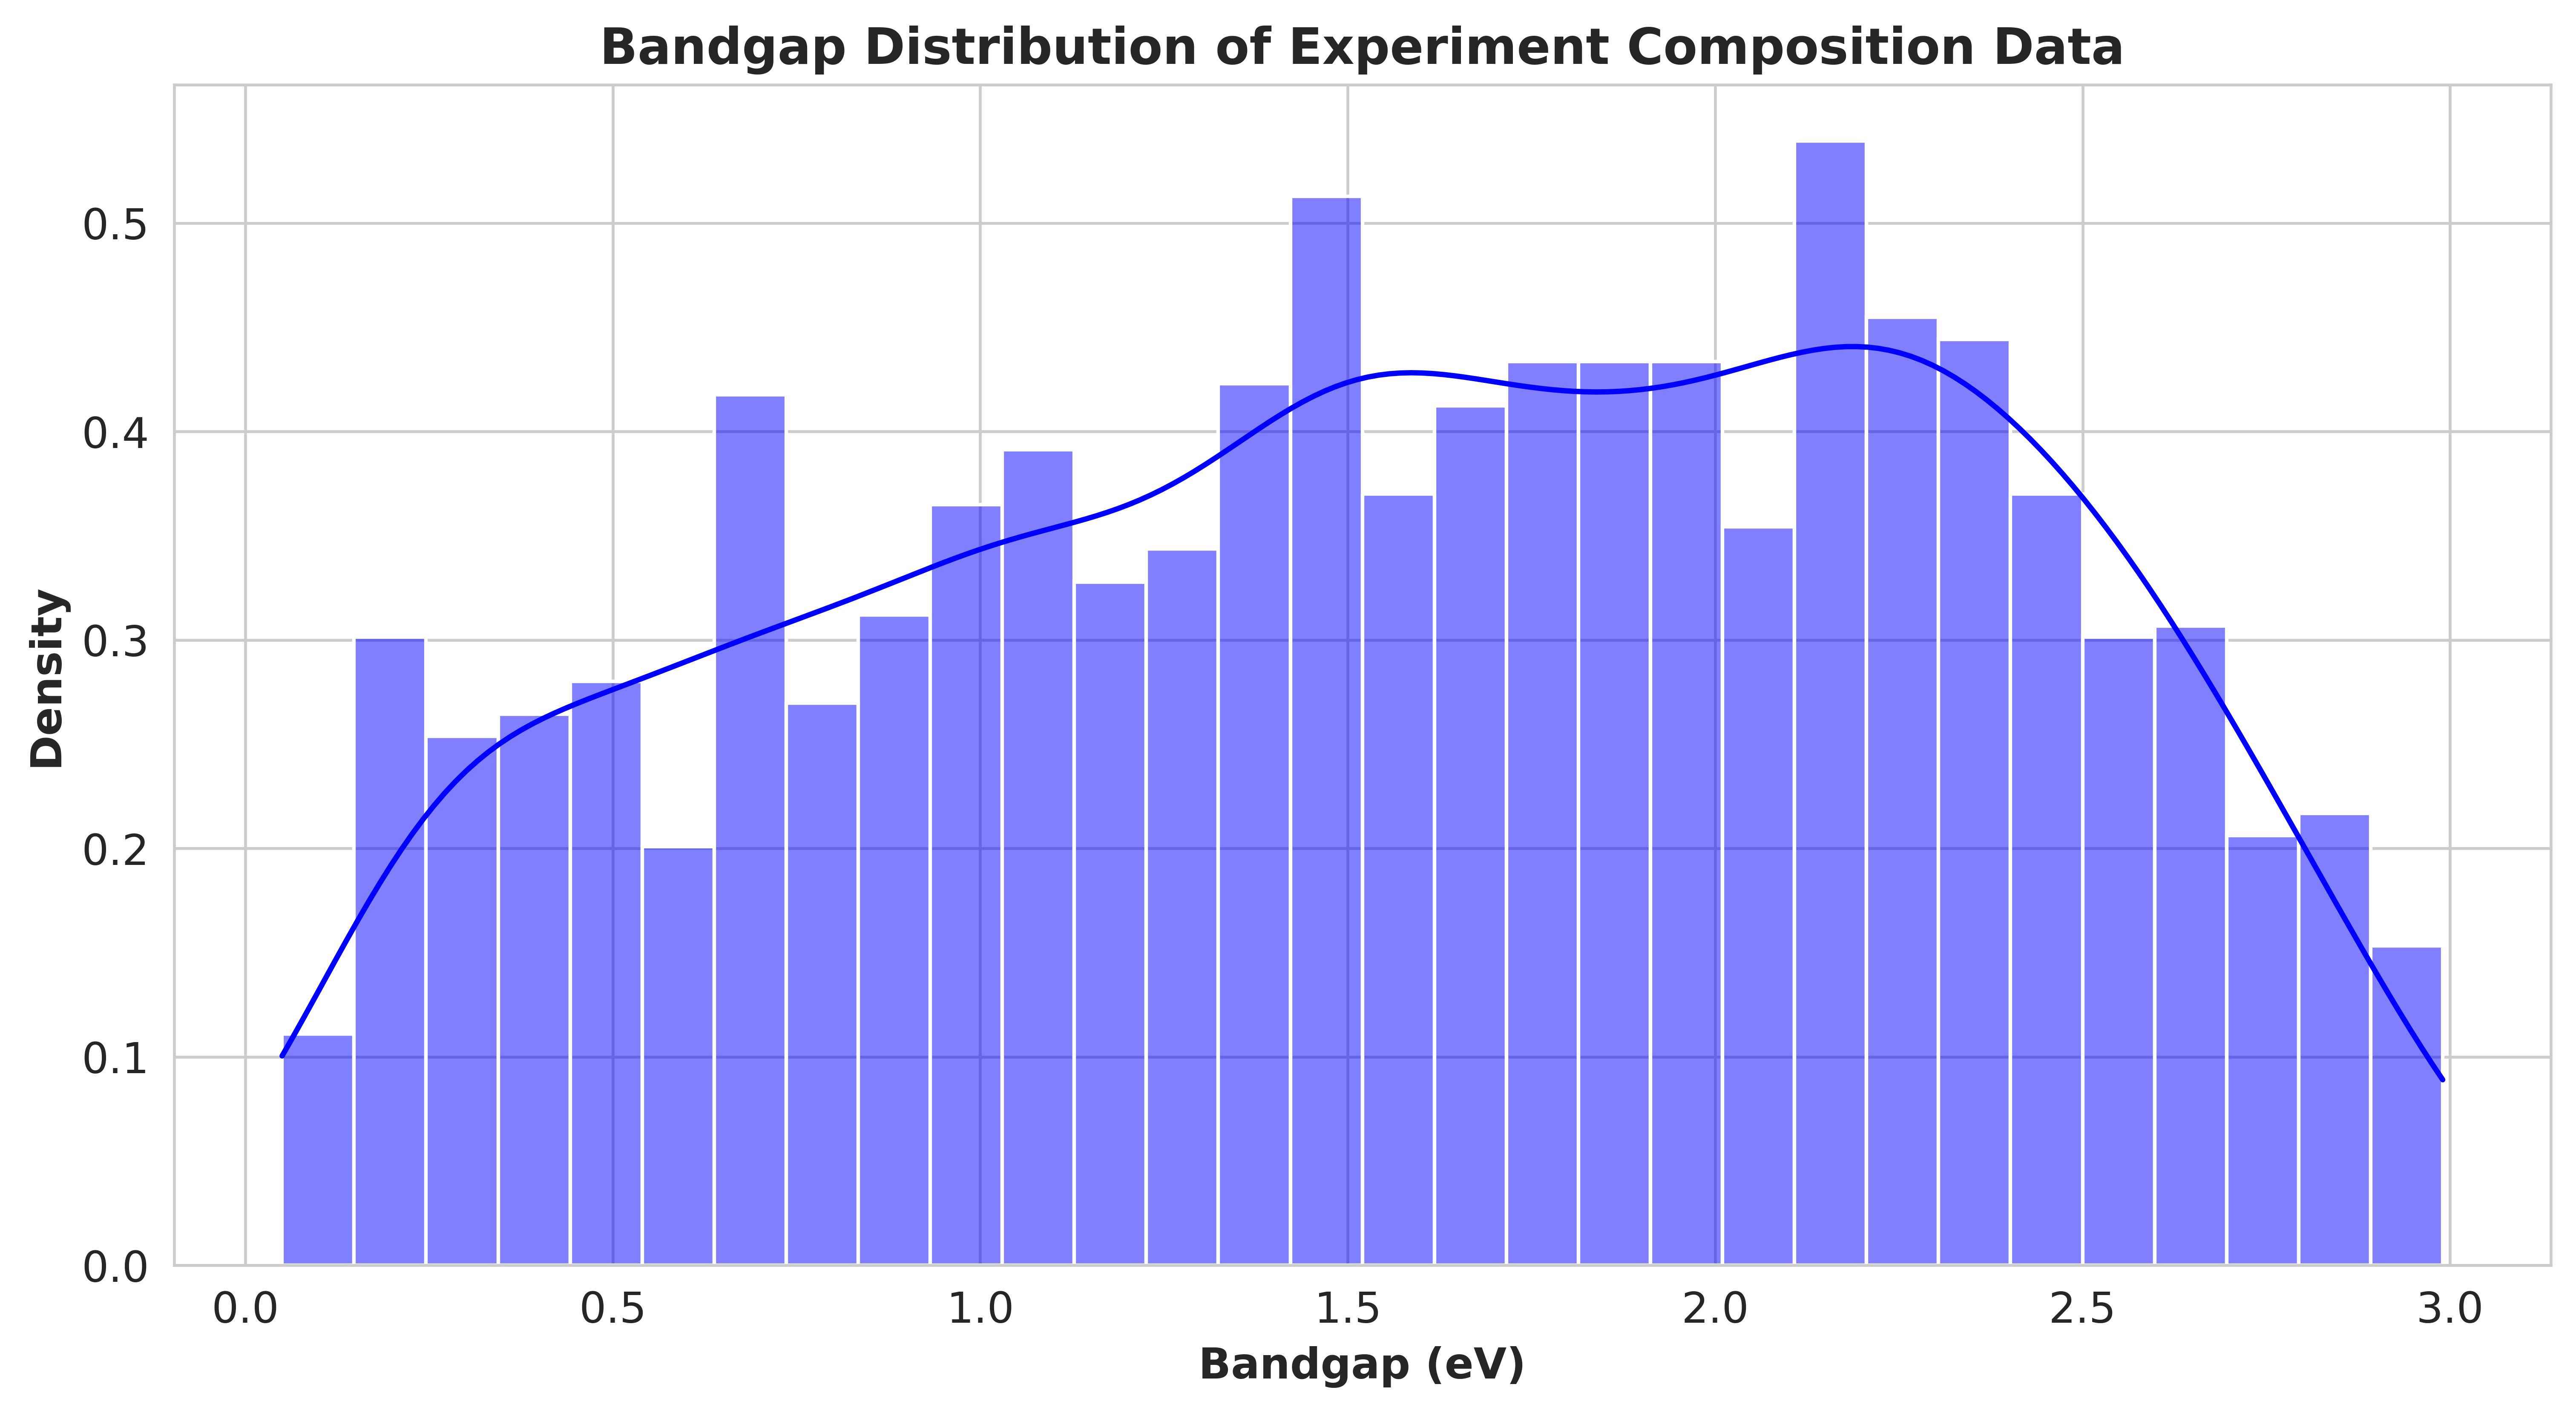

In [45]:
# draw a distribution plot of the bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(exp_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution of Experiment Composition Data", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
# Create the directory if it doesn't exist
save_dir = os.path.join(current_dir, 'figures', 'data_distribution', 'exp')
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'bandgap_distribution.png'), dpi=300)
plt.show()

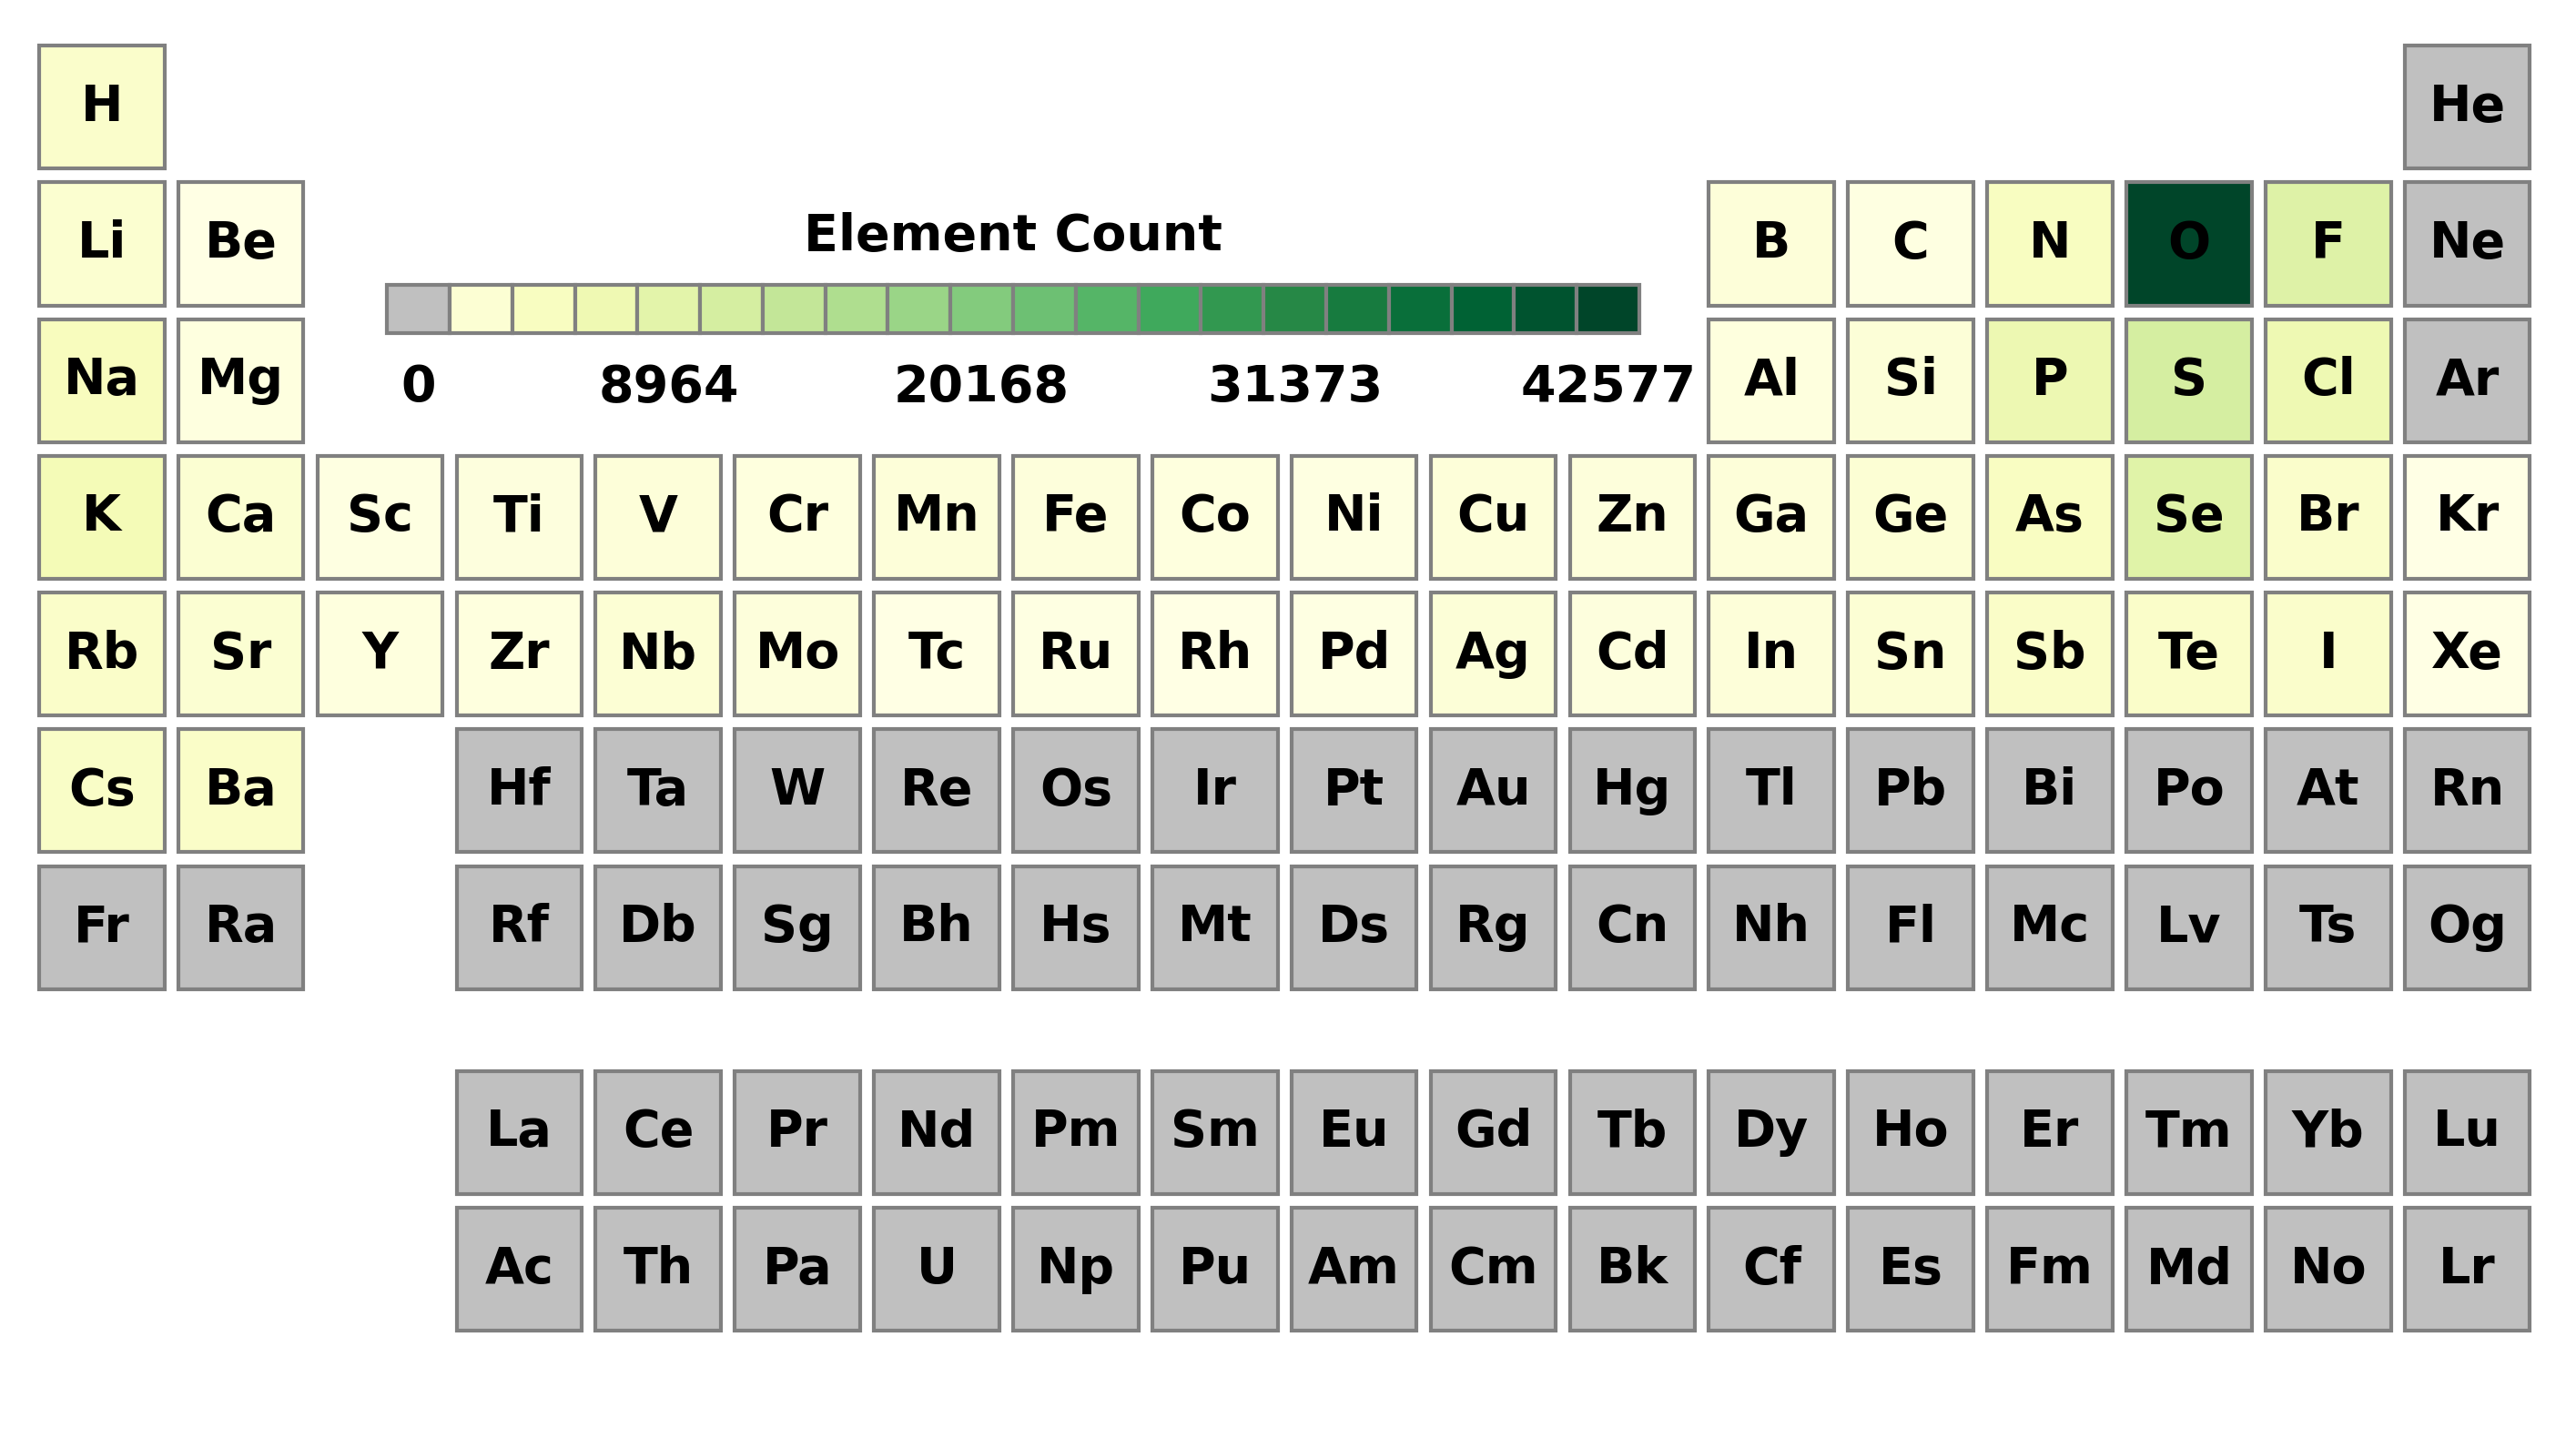

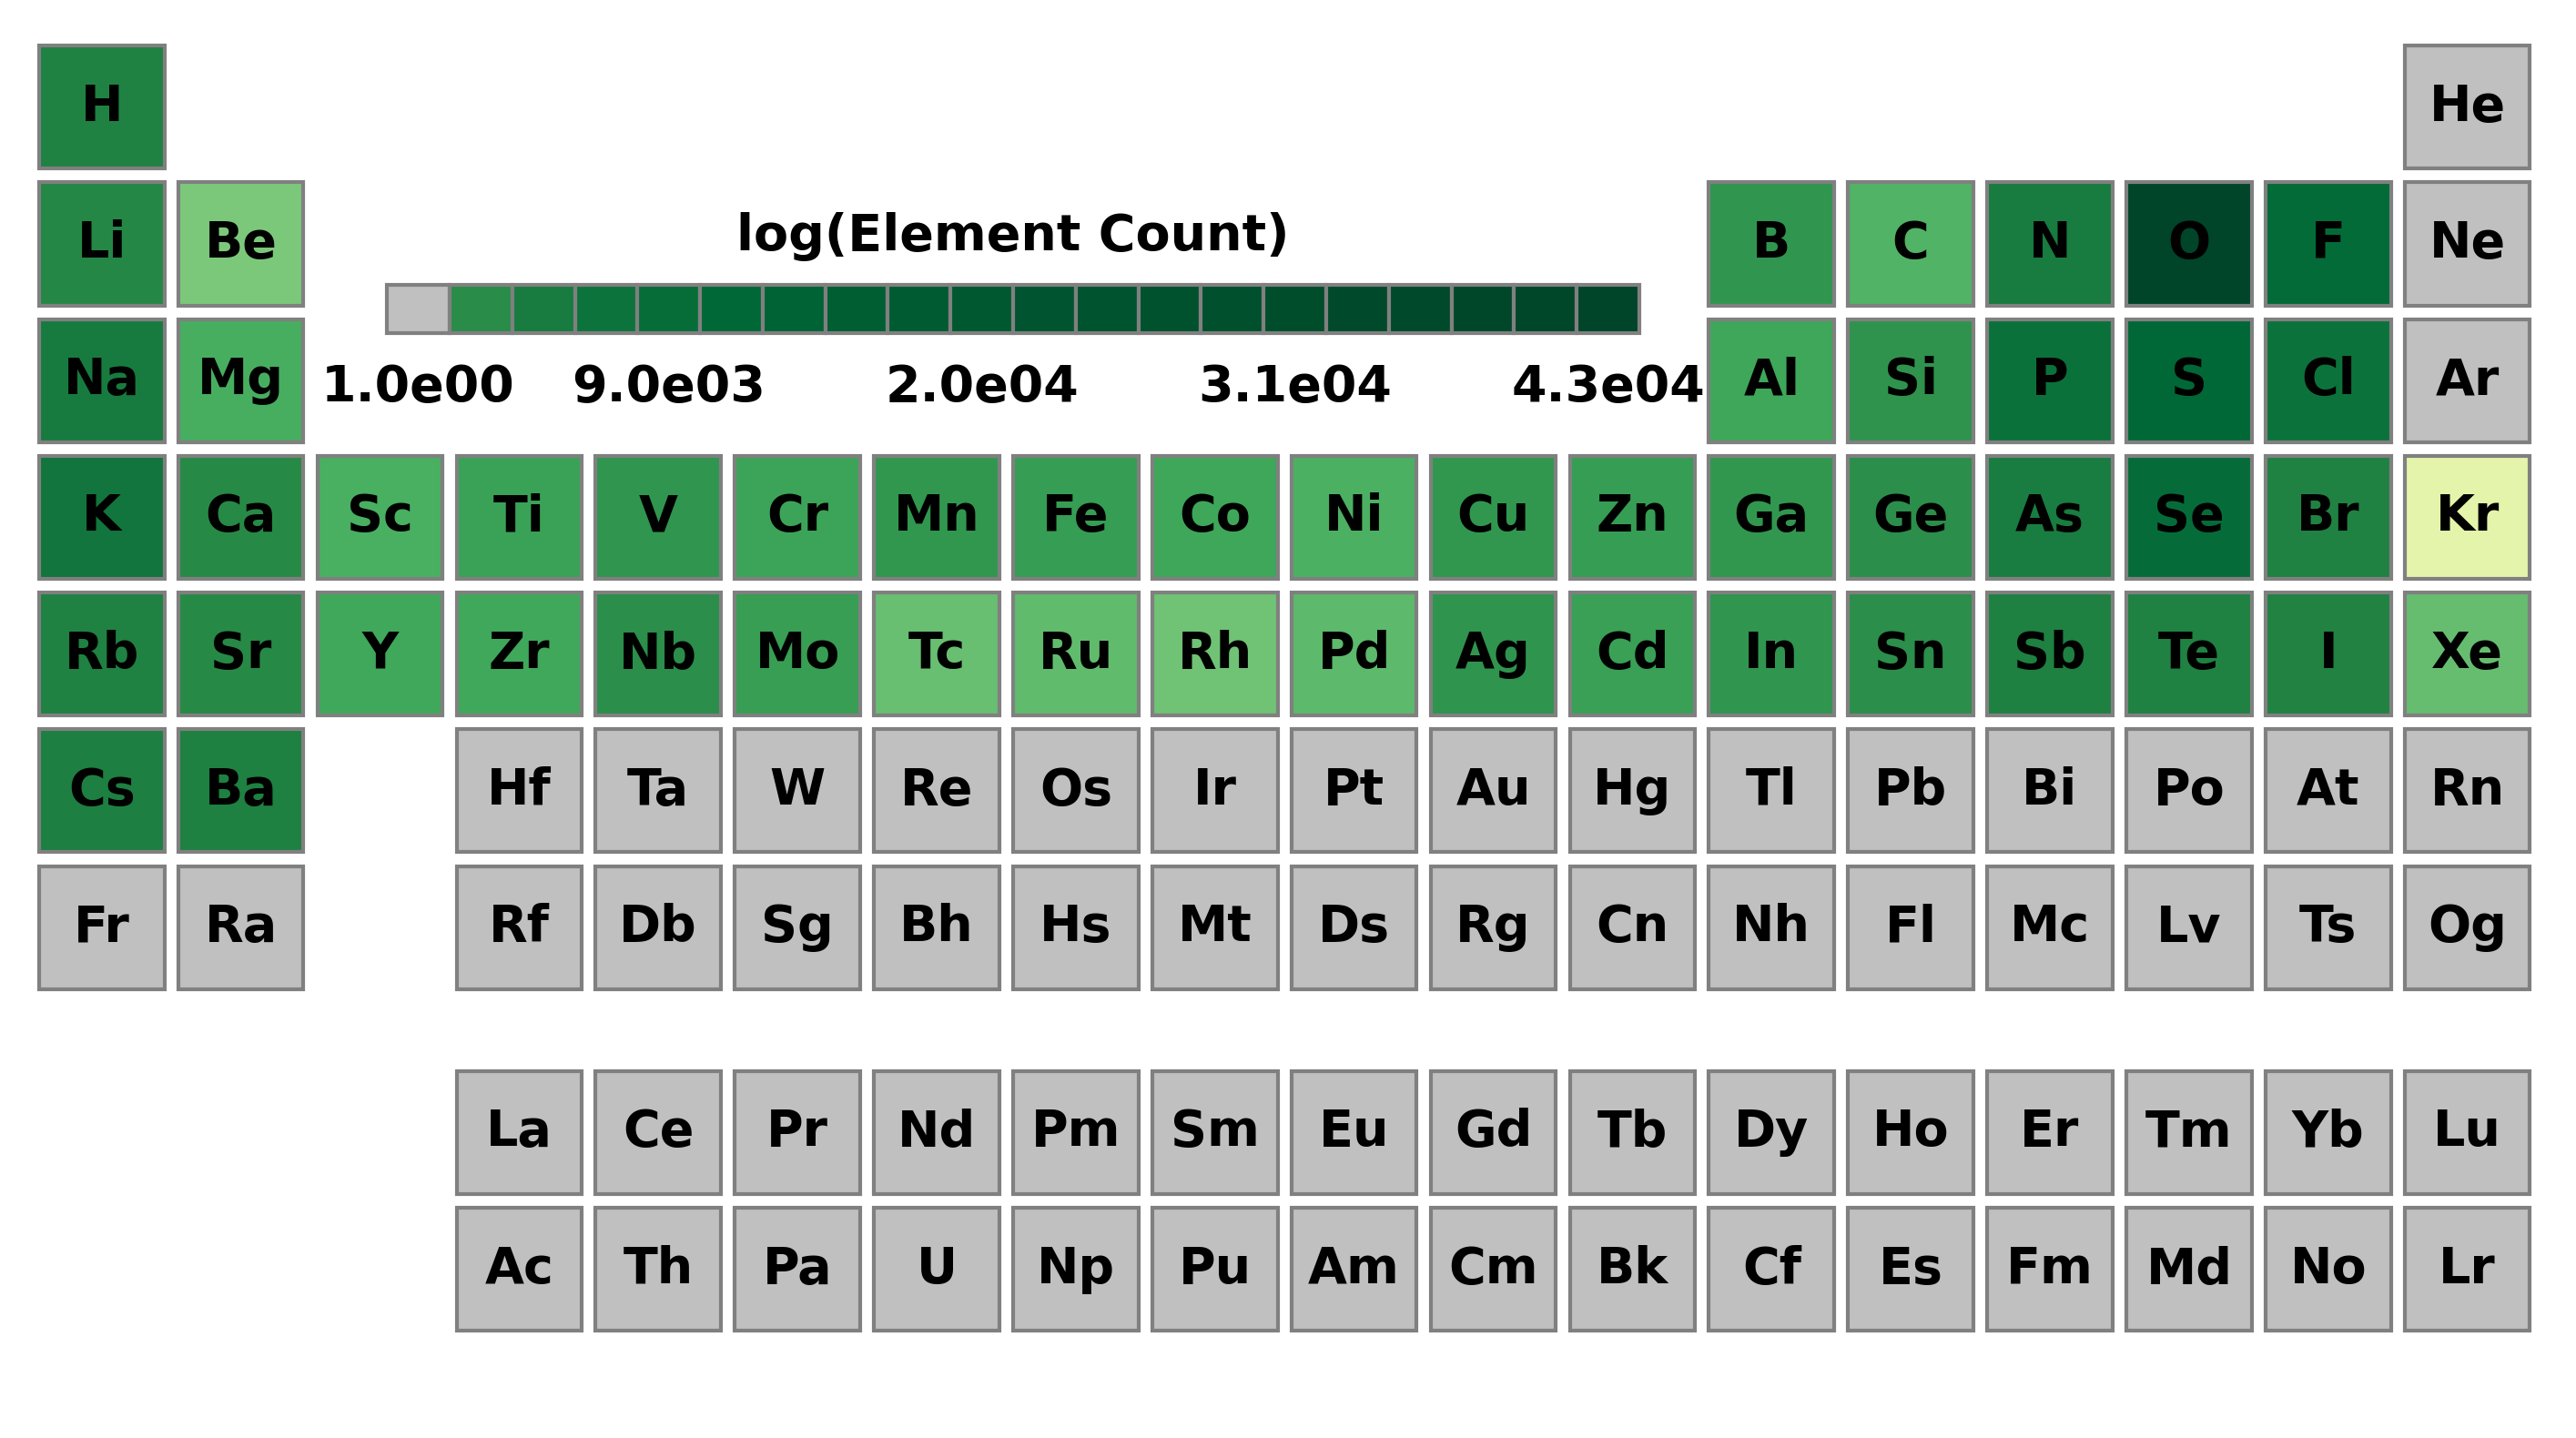

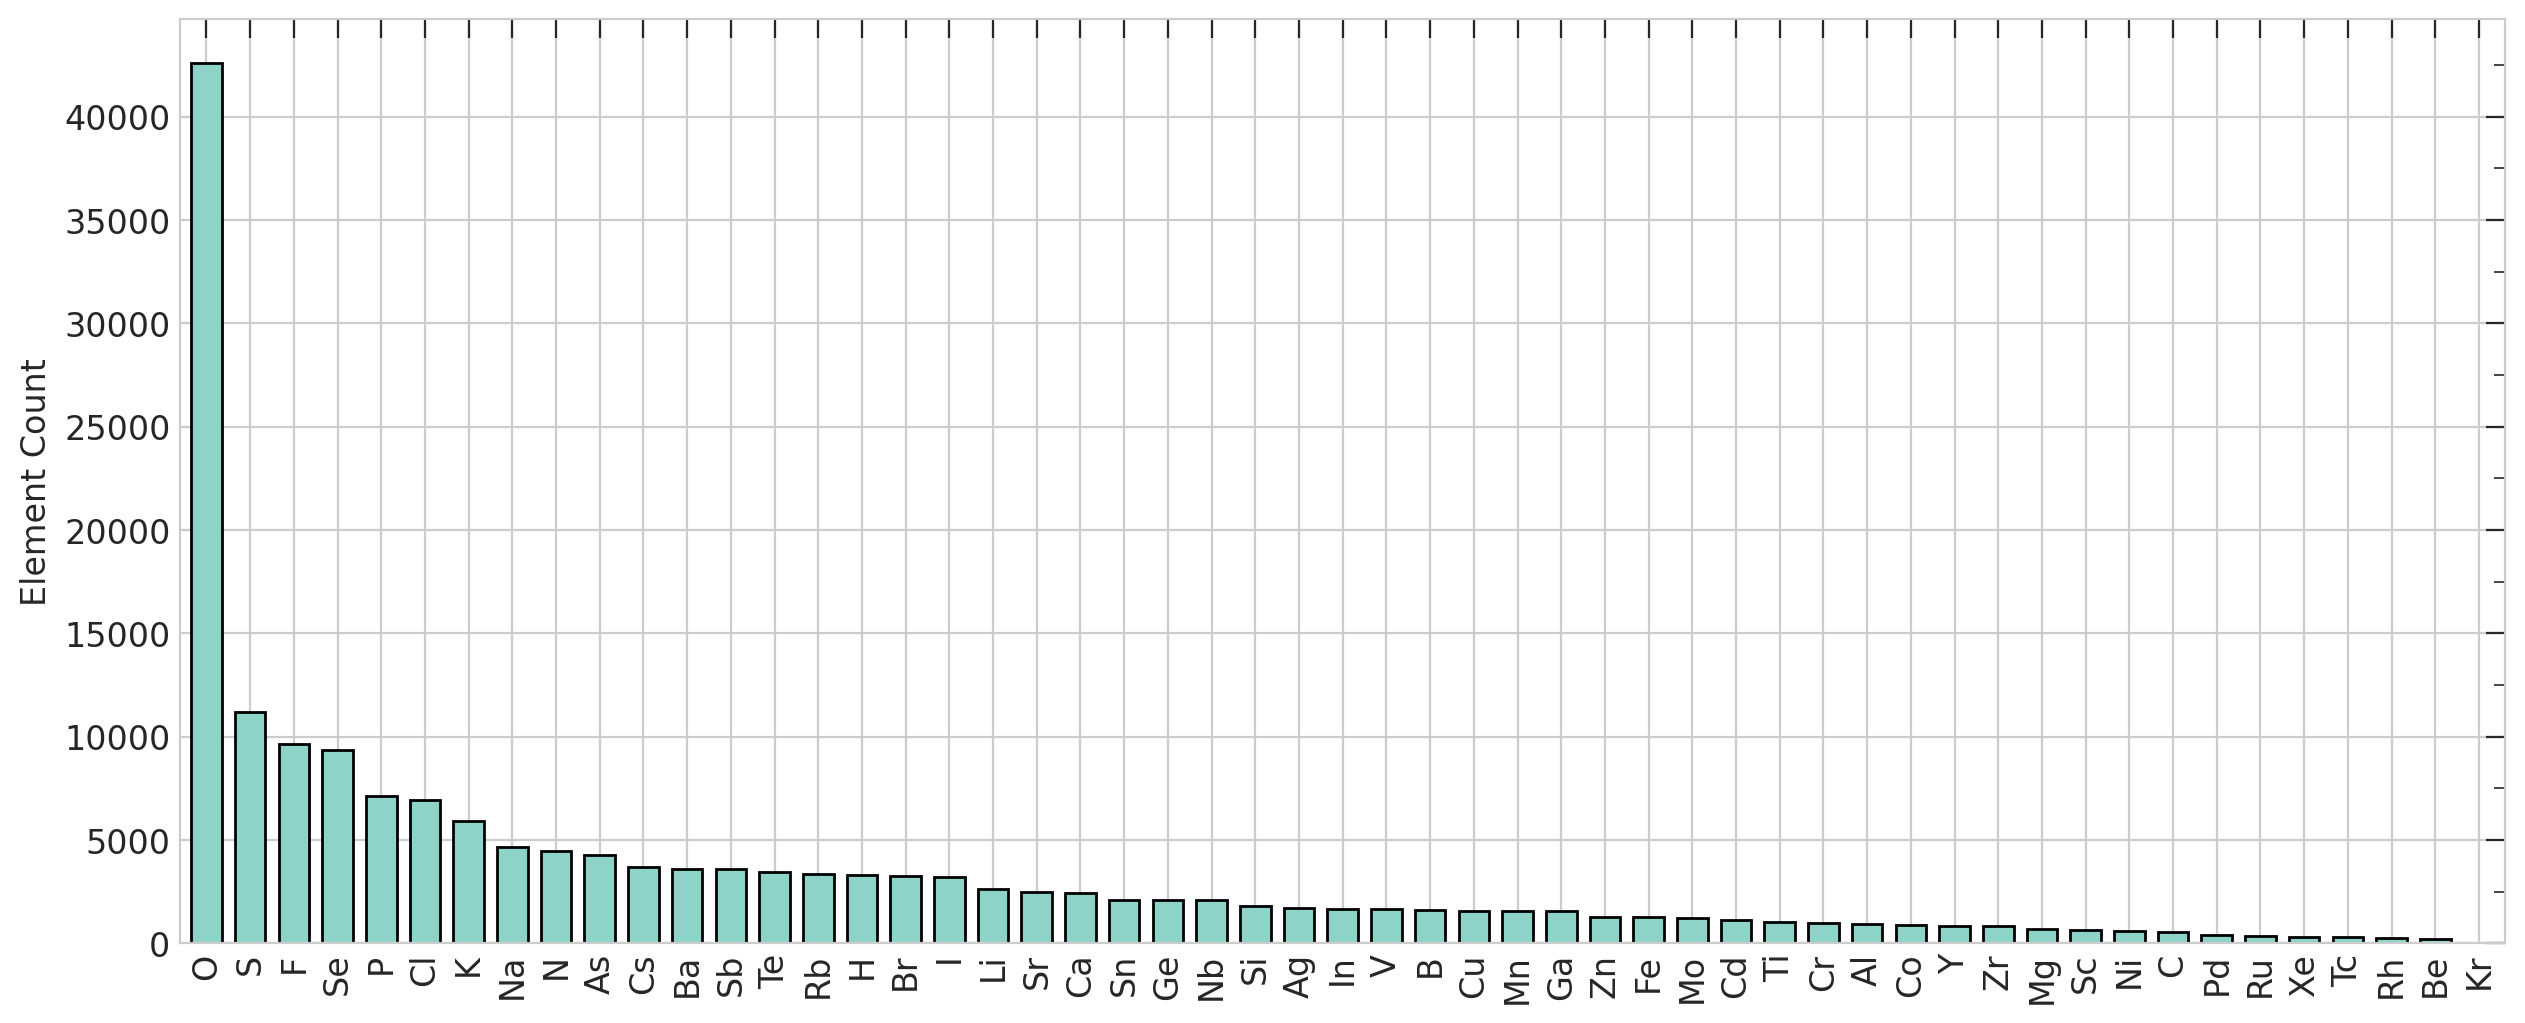

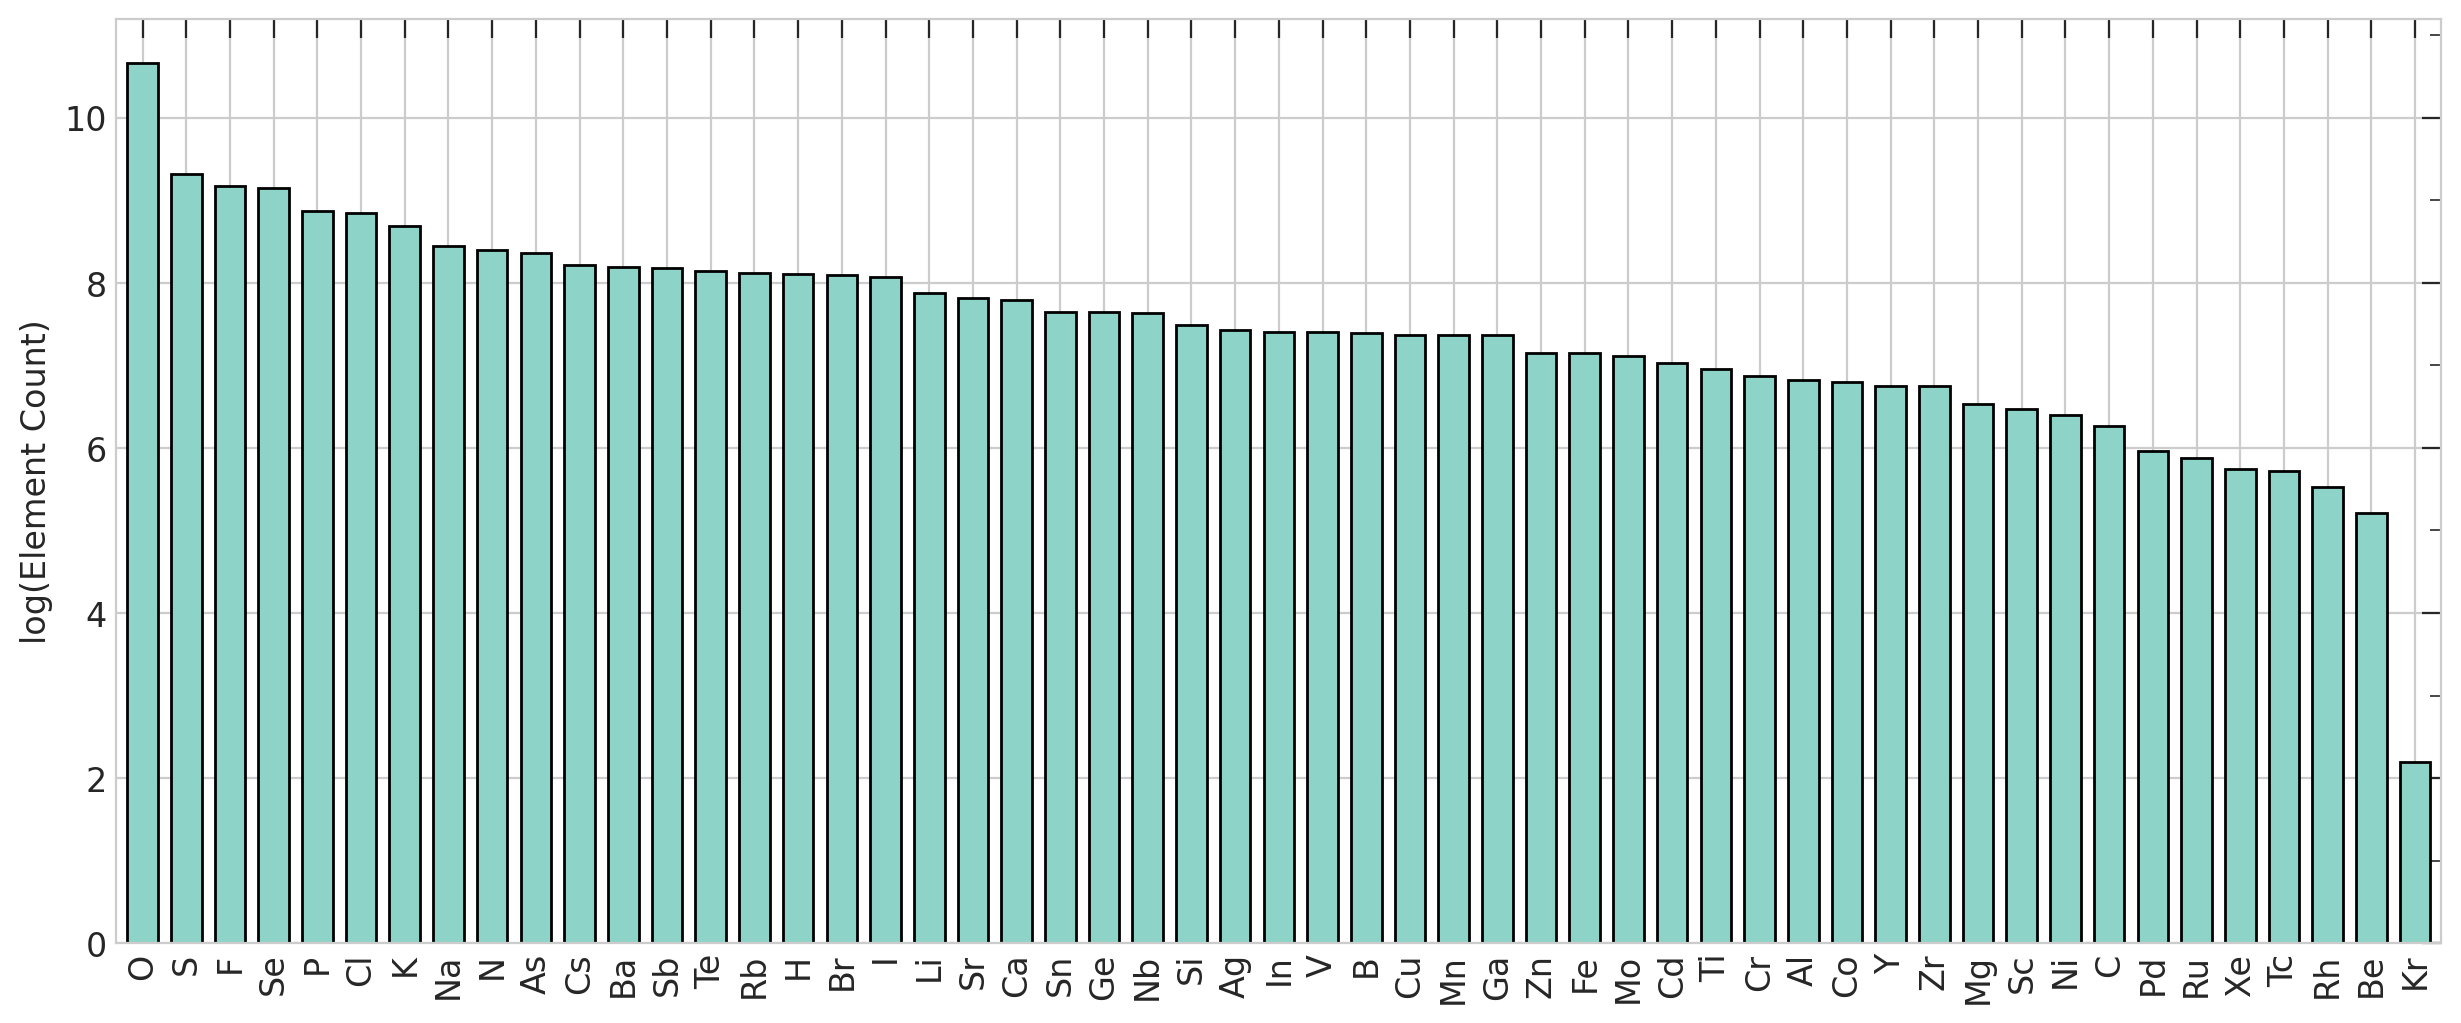

In [46]:
# To import the custom module from a specific path
import sys
sys.path.insert(0, os.path.join(current_dir, '../'))
from Utools.ML_figures.figures import element_prevalence
# Visualizing elemental prevalence in the exp dataset

current_dir = os.getcwd()
os.chdir('./Utools')  # Change to where ML_figures is a direct subdirectory

formula = data_df.iloc[:, 1]

save_dir = os.path.join(current_dir, './figures/element_prevalence/exp')
os.makedirs(save_dir, exist_ok=True)
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)

os.chdir(current_dir)  # Return to previous directory

In [43]:
exp_df['composition'] = exp_df['composition'].apply(lambda x: str(x).replace(" ", ""))
exp_df.head()

/tmp/ipykernel_13593/3656195947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_df['composition'] = exp_df['composition'].apply(lambda x: str(x).replace(" ", ""))


,composition,band_gap
3,Cu3Sb1Se4,0.40
6,Zn1In2S4,2.68
7,K2Cd3Te4,2.26
10,In1Sb1,0.22
12,K2Cu1Nb1S4,2.82


In [44]:
# Save the data of composition and band_gap to a csv file
file_path = os.path.join(current_dir, './Data/composition_data/exp_band_gap.csv')
exp_df.to_csv(file_path, index=False)